Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

------- Start --------

=== Party1 Done ===

=== Party2 Done ===

=== Party3 Done ===

=== Party4 Done ===

=== Party5 Done ===

=== Party6 Done ===



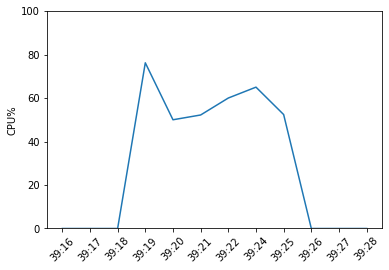

------- The End --------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
from scipy import misc, ndimage

import time
import psutil
from datetime import datetime
from threading import Timer
import matplotlib.pyplot as plt


# ------------------------------------Subroutine------------------------------------
def hello():
    global cpu,time_axis   
    cpu.append(psutil.cpu_percent(0.1))
    time_axis.append(datetime.utcnow().strftime("%M:%S"))
    if len(cpu) != len(time_axis):
      time_axis.pop()
    
class RepeatingTimer(Timer): 
    def run(self):
        while not self.finished.is_set():
            self.function(*self.args, **self.kwargs)
            self.finished.wait(self.interval)

#----------------------------------- Gaussian Filter ---------------------------------#
def Guassian(img_22): 
    
    img_size = np.shape (img)
    row_0 = np.zeros([1,img_size[1]])                                              
    column_0 = np.zeros([1,img_size[0]+2])
        
    Gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]])
    img_result = np.zeros([img_size[0], img_size[1]])    
    img_result3 = np.zeros([img_size[0], img_size[1]])
       
    img_result2 = []
    for p in range(3):
        for q in range(3): 
            for i in range (img_size[0]-2):
                for j in range(img_size[1]-2):
                    img_result[i][j] = img[p+i][q+j]*Gaussian_filter[p][q]   
            img_result2.append(np.array(img_result))
    
    for i in range (img_size[0]):
        for j in range(img_size[1]):
            temp = 0
            for k in range (9):
                temp += img_result2[k][i][j]
            img_result3[i][j] = int(temp/16)  
            
    return np.array(img_result3)

#---------------------------------------- Sobel --------------------------------------#    
def Sobel(img_afterGaussian):
    
    Sobel_filter = [[[-1,0,1],[-2,0,2],[-1,0,1]],[[-1,-2,-1],[0,0,0],[1,2,1]]]               
    sobel_result = np.zeros([img_size[0], img_size[1]]) 
    sobel_result3 = np.zeros([img_size[0], img_size[1]])
    img_sobel = np.zeros([img_size[0], img_size[1]], dtype='uint8')
    
    sobel_result4 = [] 
    for direction in range (2): 
        sobel_result2 = []
        for p in range(3):
            for q in range(3): 
                for i in range (img_size[0]-2):
                    for j in range(img_size[1]-2):
                        sobel_result[i][j] = img_afterGaussian[p+i][q+j]*Sobel_filter[direction][p][q]   
                sobel_result2.append(np.array(sobel_result))
                
        for i in range (img_size[0]):
            for j in range(img_size[1]):
                temp = 0
                for k in range (9):
                    temp += sobel_result2[k][i][j]
                sobel_result3[i][j] = int(temp) 
        sobel_result4.append(np.array(sobel_result3))   
    
    for i in range (img_size[0]):
        for j in range(img_size[1]):   
            img_sobel[i][j] = (sobel_result4[0][i][j]**2 + sobel_result4[1][i][j]**2)**(1/2)
            
    return img_sobel


# ---------------------------------------- Wait ---------------------------------------- 

filepath = '/content/drive/MyDrive/Party1.npy'

# 檢查檔案是否存在
while(not os.path.isfile(filepath)):
  pass

#------------------------------------  Main ----------------------------------#

cpu = []
time_axis = []

t_cpu = RepeatingTimer(1, hello)
t_cpu.start()
time.sleep(3)

img_party = np.load(filepath)

img_size = np.shape(img_party)
print("Gaussian")
# print(datetime.utcnow().strftime("%M:%S"))
img_G= Guassian(img_party)
# print(datetime.utcnow().strftime("%M:%S"))

print("Sobel")
img= Sobel(img_G) 
# print(datetime.utcnow().strftime("%M:%S"))

np.save('/content/drive/MyDrive/Party1_complete', img)

!rm /content/drive/MyDrive/Party1.npy

time.sleep(3)
t_cpu.cancel() 
data_x = cpu[0:len(cpu)]
data_y = time_axis[0:len(time_axis)]

plt.figure(20)
plt.plot(data_y,data_x, label='CPU')
plt.ylabel('CPU%')
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.show()       

data = []
data.append(data_x)
data.append(data_y)
np.save('/content/drive/MyDrive/Colab_cpu', data)